<a href="https://colab.research.google.com/github/tuchinhung/Quantu-ML/blob/main/Machine_Learning_Model_Quantum_PennyLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando codigo do XanaduAI e fezemos uma replicação e pouco intepletação pessoal.



In [1]:
# Comment this out if you don't want to install pennylane from this notebook
!pip install pennylane

     |████████████████████████████████| 409kB 8.0MB/s 
  Created wheel for pennylane: filename=PennyLane-0.14.1-cp37-none-any.whl size=481980 sha256=89f52d8968b21a2c5f3949ad362a434b9fb611860184ffcb0a3aa8c9ba05cc28
  Stored in directory: /root/.cache/pip/wheels/6e/a9/c9/04941d6dd58b3c111cbd1389bf63ba1b23362c137359af4626
Successfully built pennylane


In [ ]:
# Comment this out if you don't want to install matplotlib from this notebook
!pip install matplotlib

In [ ]:
# Comment this out if you don't want to install qiskit from this notebook
!pip install qiskit

# Treinar um modelo de aprendizado de máquina com diferenciação automática

Neste tutorial, iremos:

*   Implementar uma versão de brinquedo de uma configuração típica de aprendizado de máquina,
*   Entenda como a diferenciação automática nos permite calcular gradientes do modelo de aprendizado de máquina e
*   Use a diferenciação automática para treinar o modelo.

Primeiro algumas importações ...

In [ ]:
from pennylane import numpy as np # This will import a special, "differentiable" version of numpy.

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

Importar numpy via pennylane envolve o numpy em uma estrutura de "diferenciação automática". Agora podemos calcular automaticamente o gradiente da maioria das funções numpy.

[0.         0.31578947 0.63157895 0.94736842 1.26315789 1.57894737
 1.89473684 2.21052632 2.52631579 2.84210526 3.15789474 3.47368421
 3.78947368 4.10526316 4.42105263 4.73684211 5.05263158 5.36842105
 5.68421053 6.        ]
[ 0.          0.310567    0.59041986  0.81188195  0.95305133  0.99996678
  0.9479885   0.80225698  0.57718464  0.29503045 -0.01630136 -0.32602102
 -0.60349817 -0.82129115 -0.95786089 -0.99970104 -0.94267373 -0.79241881
 -0.56379603 -0.2794155 ]
[tensor(1., requires_grad=True), tensor(0.95055149, requires_grad=True), tensor(0.80709627, requires_grad=True), tensor(0.58382164, requires_grad=True), tensor(0.30280879, requires_grad=True), tensor(-0.00815095, requires_grad=True), tensor(-0.31830459, requires_grad=True), tensor(-0.59697884, requires_grad=True), tensor(-0.81661368, requires_grad=True), tensor(-0.95548785, requires_grad=True), tensor(-0.99986712, requires_grad=True), tensor(-0.94536252, requires_grad=True), tensor(-0.79736438, requires_grad=True), tensor(-0

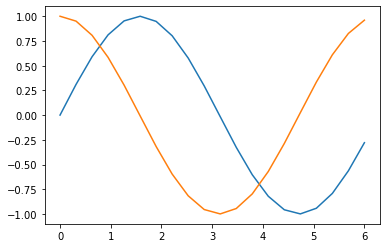

In [ ]:
x_axis = np.linspace(0, 6, 20)
s = np.sin(x_axis)
print(x_axis)
print(s)

gradient_fn = qml.grad(np.sin, argnum=0)

g = [gradient_fn(x) for x in x_axis]

plt.plot(x_axis, s)
plt.plot(x_axis, g)

1. Os três ingredientes básicos

Um problema de aprendizado de máquina geralmente consiste em dados, um modelo (família) e uma função de custo:

O treinamento seleciona o melhor modelo da família, minimizando o custo em um conjunto de treinamento de amostras de dados. Se projetarmos bem o problema de otimização, o modelo treinado também terá um custo baixo em novos conjuntos de amostras de dados que não foram usados no treinamento. Isso significa que o modelo generaliza bem.

Vamos agora criar exemplos para cada ingrediente.

#Dados

Vamos criar um conjunto de dados de brinquedo bidimensional.


In [ ]:
np.random.seed(42)
n_samples = 100
X0 = np.array([[np.random.normal(loc=-1, scale=1), 
                np.random.normal(loc=1, scale=1)] for i in range(n_samples//2)]) 
X1 = np.array([[np.random.normal(loc=1, scale=1), 
                np.random.normal(loc=-1, scale=1)] for i in range(n_samples//2)]) 
print(X0)

[[-0.50328585  0.8617357 ]
 [-0.35231146  2.52302986]
 [-1.23415337  0.76586304]
 [ 0.57921282  1.76743473]
 [-1.46947439  1.54256004]
 [-1.46341769  0.53427025]
 [-0.75803773 -0.91328024]
 [-2.72491783  0.43771247]
 [-2.01283112  1.31424733]
 [-1.90802408 -0.4123037 ]
 [ 0.46564877  0.7742237 ]
 [-0.9324718  -0.42474819]
 [-1.54438272  1.11092259]
 [-2.15099358  1.37569802]
 [-1.60063869  0.70830625]
 [-1.60170661  2.85227818]
 [-1.01349722 -0.05771093]
 [-0.17745509 -0.22084365]
 [-0.7911364  -0.95967012]
 [-2.32818605  1.19686124]
 [-0.26153342  1.17136828]
 [-1.11564828  0.6988963 ]
 [-2.47852199  0.28015579]
 [-1.46063877  2.05712223]
 [-0.65638171 -0.76304016]
 [-0.67591603  0.61491772]
 [-1.676922    1.61167629]
 [ 0.03099952  1.93128012]
 [-1.83921752  0.69078762]
 [-0.66873657  1.97554513]
 [-1.47917424  0.81434102]
 [-2.10633497 -0.19620662]
 [-0.18747418  2.35624003]
 [-1.07201012  2.0035329 ]
 [-0.63836397  0.35488025]
 [-0.63860439  2.53803657]
 [-1.03582604  2.56464366]
 

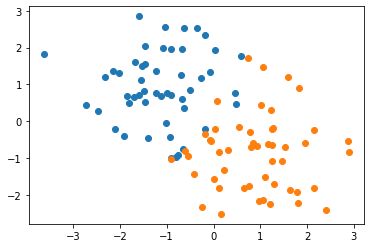

In [ ]:
# Mostrando as duas variaveis em grafico em baixo:
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])
plt.show()

In [ ]:
# concatenar variaveis X0 e X1
X = np.concatenate([X0, X1], axis=0)
# concatenar variaveis -1 e 1 com tamanho de 50 de cada
Y = np.concatenate([-np.ones(50), np.ones(50)], axis=0)
# Criou o banco de dados
data = list(zip(X, Y))
print(data)

[(tensor([-0.50328585,  0.8617357 ], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-0.35231146,  2.52302986], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-1.23415337,  0.76586304], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([0.57921282, 1.76743473], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-1.46947439,  1.54256004], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-1.46341769,  0.53427025], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-0.75803773, -0.91328024], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-2.72491783,  0.43771247], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-2.01283112,  1.31424733], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([-1.90802408, -0.4123037 ], requires_grad=True), tensor(-1., requires_grad=True)), (tensor([0.46564877, 0.7742237 ], requires_grad=True), tensor(-1., requires_grad=True)), (t

In [ ]:
data[0]

(tensor([-0.50328585,  0.8617357 ], requires_grad=True),
 tensor(-1., requires_grad=True))

#Família modelo

A seguir, construímos um modelo linear.

Esta função retorna o produto escalar de duas matrizes. 
Para vetores 2-D, é o equivalente à multiplicação de matrizes. 
Para matrizes 1-D, é o produto interno dos vetores. 
Para matrizes N-dimensionais, é um produto da soma sobre o último eixo de ae o penúltimo eixo de b.

In [ ]:
# Esta função retorna o produto escalar de duas matrizes. 
def model(x, w):
    return np.dot(x, w)

In [ ]:
# Vamos experimentar.
w = np.array([-0.2, -0.2])
print(w)
model(X0[0], w)

[-0.2 -0.2]


-0.07168997036800961

Podemos traçar o limite de decisão ou o limite no espaço de dados onde o modelo muda de uma previsão negativa para uma previsão positiva.

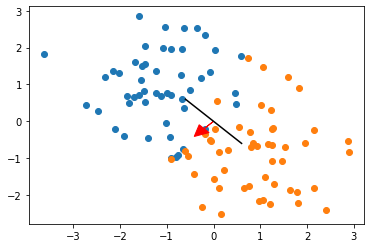

In [ ]:
# construr o grafico de ponto para variaveis X0 e X1
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])
# traca a reta
plt.arrow(0, 0, w[0], w[1], head_width=0.3, head_length=0.3, fc='r', ec='r')
plt.plot([-3*w[1], 3*w[1]], [3*w[0], -3*w[0]], 'k-')
plt.show()

#Função de custo
Quão bom é o modelo em um único par de treinamento de entrada-saída?

In [ ]:
# Função de custo (a-b)^2 Perda de erro quadrático
def loss(a, b):
    return (a - b)**2

In [ ]:
loss(-1, -1)

0

Qual é a perda média em um conjunto de dados de vários pares?

In [ ]:
# Perda média
def average_loss(w, data):
    c = 0
    for x, y in data:
        prediction = model(x, w) # função do produto escalar
        c += loss(prediction, y) # Função de perda de erro quadrático
    return c/len(data)

In [ ]:
w = np.array([0.1, -0.1])
average_loss(w, data)

0.6705617111275896

2. Cálculo automático de gradientes

Como importamos a versão numpy do PennyLane, agora podemos calcular gradientes da perda média em relação aos pesos!

In [ ]:
# Usando a valor da perda media anterior
gradient_fn = qml.grad(average_loss, argnum=0)
gradient_fn(w, data)

array([-1.50619253,  1.25442995])

Podemos usar gradientes para adivinhar melhores candidatos para parâmetros.

In [ ]:
# valor da perda media pelo gradiente descendente
w_new = w - 0.05*gradient_fn(w, data)
average_loss(w_new, data)

0.5039476500948409

Isso funciona porque o gradiente sempre aponta para a subida mais íngreme na paisagem de custos.




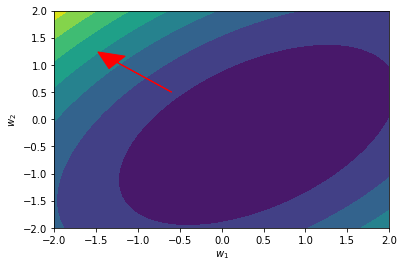

In [ ]:
# calcular o gradiente em algum ponto no espaço de parâmetros
some_w = np.array([-0.6, 0.5])
g = 0.01*gradient_fn(some_w, data)

# faça um gráfico de contorno do custo
w1s = np.linspace(-2, 2)
w2s = np.linspace(-2, 2)
cost_grid = []
for w1 in w1s:
    for w2 in w2s:
        w = np.array([w1, w2])
        cost_grid.append(average_loss(w, data))
cost_grid = np.array(cost_grid).reshape((50, 50))
plt.contourf(w1s, w2s, cost_grid.T)

plt.arrow(some_w[0], some_w[1], some_w[0] + g[0], some_w[1] + g[1], 
          head_width=0.3, head_length=0.3, fc='r', ec='r')
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.show()

3. Treinamento com descida gradiente

Juntando tudo, podemos treinar o modelo linear.



In [ ]:
# sortia 2 valores peso w inicial aleatorio
w_init = np.random.random(size=(2,))
# sortia outra 2 peso w
w = np.array(w_init)
# perda meida sobre o peso novo ate 15 fezes
history = []
for i in range(15):
    w_new = w - 0.05*gradient_fn(w, data)
    print(average_loss(w_new, data))
    history.append(w_new)
    w = w_new

1.454135633042869
1.1213684466221228
0.9087872008922404
0.766523354478631
0.6668037637287766
0.5938954145741451
0.538673145533744
0.49567680160124583
0.46151030255760384
0.4339652090879671
0.411536393108168
0.39315070245011713
0.3780119726704392
0.36551012428094265
0.35516599316193864


Podemos facilmente visualizar o caminho que a descida gradiente percorreu no espaço de parâmetros.

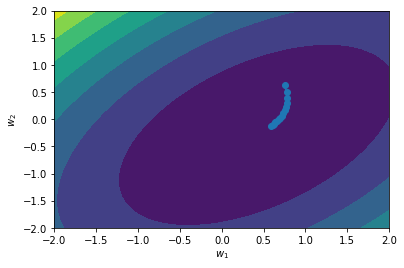

In [ ]:
plt.contourf(w1s, w2s, cost_grid.T)
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], "-o")
plt.xlabel(r"$w_1$")
plt.ylabel(r"$w_2$")
plt.show()

O treinamento ainda não convergiu totalmente, mas o limite de decisão já é melhor.

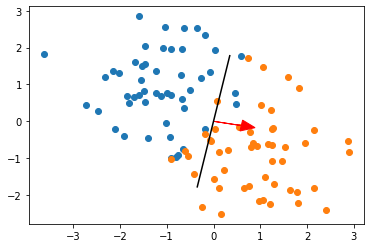

In [ ]:
plt.scatter(X0[:,0], X0[:,1])
plt.scatter(X1[:,0], X1[:,1])

plt.arrow(0, 0, w[0], w[1], head_width=0.3, head_length=0.3, fc='r', ec='r')
plt.plot([-3*w[1], 3*w[1]], [3*w[0], -3*w[0]], 'k-')
plt.show()

# Computação quântica diferenciável com PennyLane, 
Vamos apresenta em baixo:

*   Aprenda passo a passo como os cálculos quânticos são implementados no PennyLane,
*   Compreender cálculos quânticos dependentes de parâmetros ("circuitos variacionais"),
*   Construir nosso primeiro modelo de aprendizado de máquina quântico e
calcule seu gradiente.

Nova seção

Precisamos das seguintes importações:

In [ ]:
import pennylane as qml
from pennylane import numpy as np

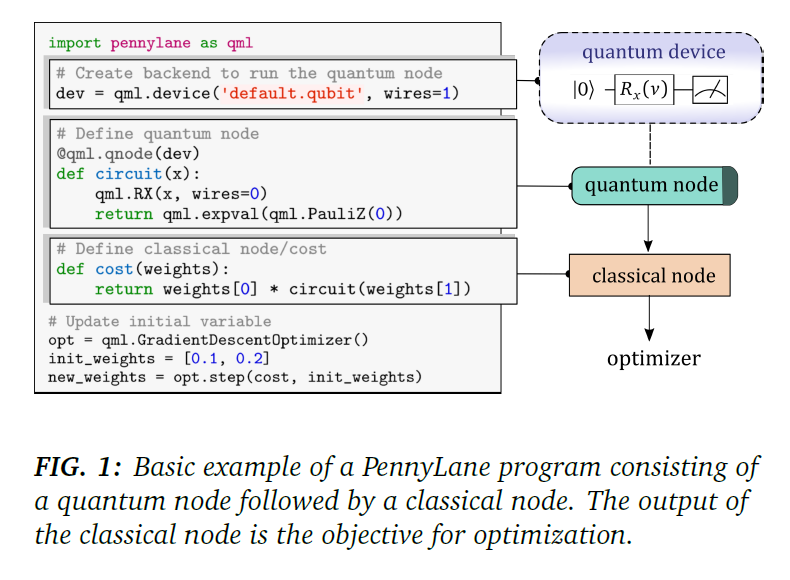

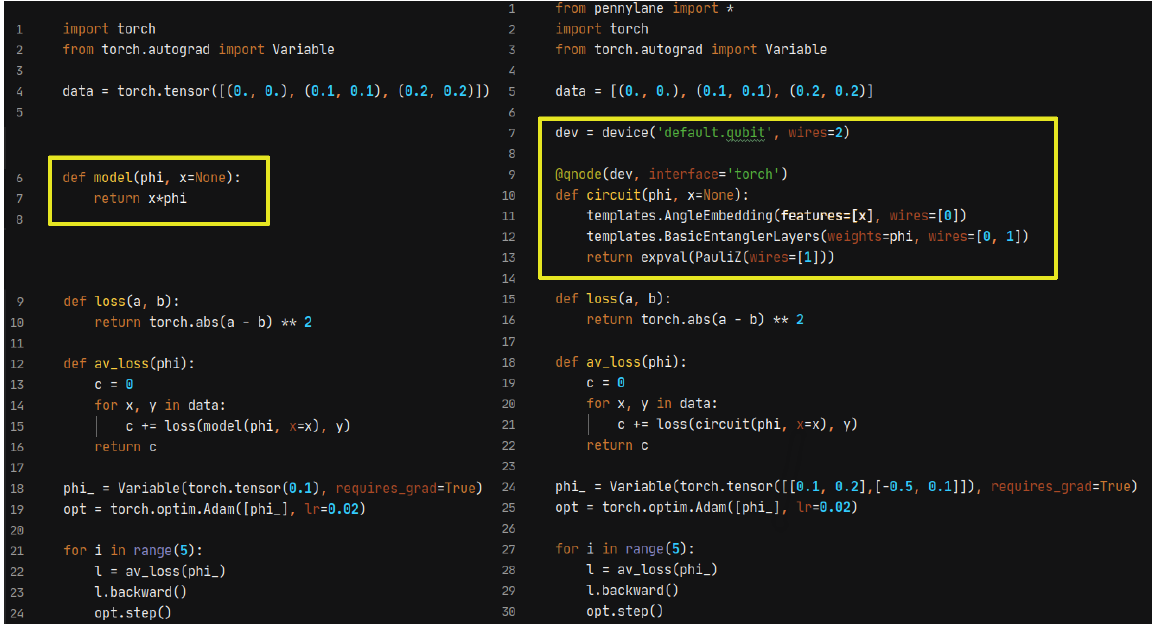

1. Quantum nodes

Em PennyLane, um nó quântico é uma unidade computacional que envolve a construção, avaliação, pré e pós-processamento de cálculos quânticos.

Um nó quântico consiste em uma função quântica que define um circuito, bem como um dispositivo no qual ele é executado.

Aqui, usaremos o dispositivo default.qubit embutido.

In [ ]:
dev = qml.device('default.qubit', wires=2)

Para combinar o dispositivo com uma função quântica a um nó quântico, podemos usar o decorador qml.qnode. A função pode então ser avaliada como se fosse qualquer outra função Python. Internamente, ele construirá um circuito e o executará no dispositivo.

In [ ]:
# Cria o circuito Hadamard
@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0, 1])

circuit()

tensor([0.5, 0. , 0.5, 0. ], requires_grad=True)

2. Construindo circuitos quânticos

O estado inicial

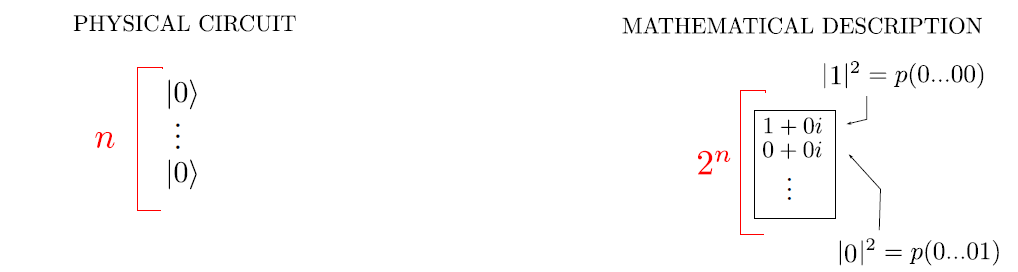


O estado inicial tem 100% de probabilidade de ser medido na configuração "0..0". 

Vamos ver como podemos verificar isso com PennyLane

In [ ]:
# Cria um estado de probabilidade ser medido em |0>
@qml.qnode(dev)
def circuit():
    return qml.probs(wires=[0, 1])

circuit()

tensor([1., 0., 0., 0.], requires_grad=True)

O vetor de estado interno que usamos para controlar matematicamente as probabilidades é de valor complexo. Como default.qubit é um simulador, podemos dar uma olhada no estado, por exemplo, verificando o atributo de estado do dispositivo.

In [ ]:
dev.state

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

Unitary evolutions

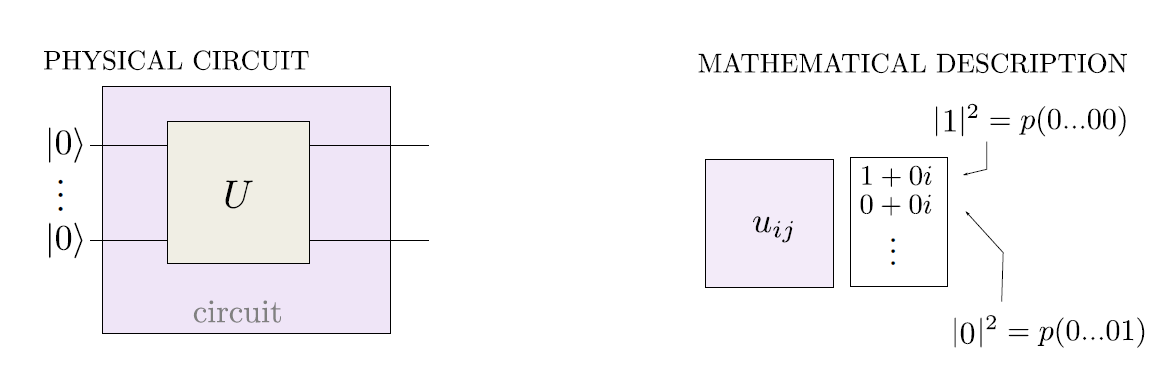


Os circuitos quânticos são representados por matrizes unitárias. Podemos evoluir o estado inicial por uma matriz unitrária arbitrária da seguinte forma:

In [ ]:
s = 1/np.sqrt(2)
U = np.array([[0., -s, 0.,  s],
              [ s, 0., -s, 0.],
              [ s, 0.,  s, 0.],
              [0., -s, 0., -s]])

@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(U, wires=[0, 1])
    return qml.probs(wires=[0, 1])

circuit()

tensor([0. , 0.5, 0.5, 0. ], requires_grad=True)

O estado quântico interno mudou.

In [ ]:
dev.state

tensor([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j], requires_grad=True)

Resultados da amostra de medições da distribuição

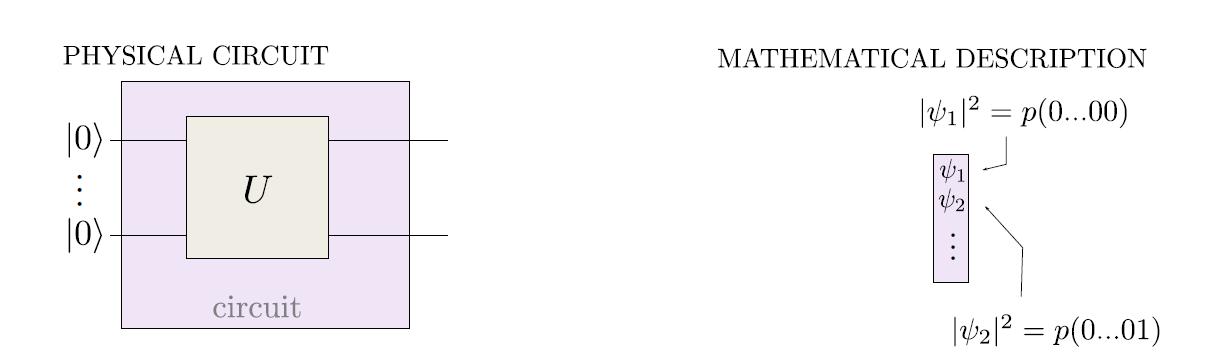


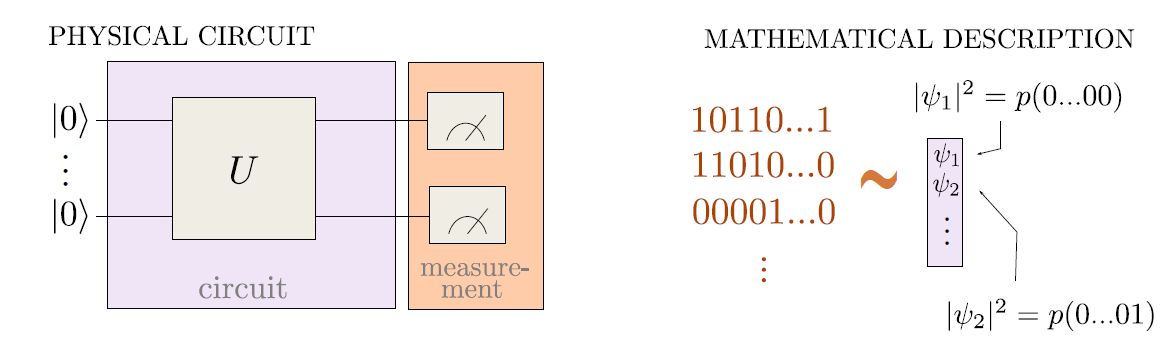

---






A medição mais comum leva amostras $-1, 1$ do observável "Pauli-Z". As amostras indicam se o qubit foi medido no estado $| 0 \rangle$ ou $| 1 \rangle$.

In [ ]:
@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(U, wires=[0, 1])
    return qml.sample(qml.PauliZ(wires=0)), qml.sample(qml.PauliZ(wires=1))

circuit()

tensor([[-1,  1, -1, ..., -1,  1,  1],
        [ 1, -1,  1, ...,  1, -1, -1]], requires_grad=True)

O estado quântico ainda deve ser o mesmo acima.



In [ ]:
dev.state

tensor([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j], requires_grad=True)

Calculando valores de expectativa

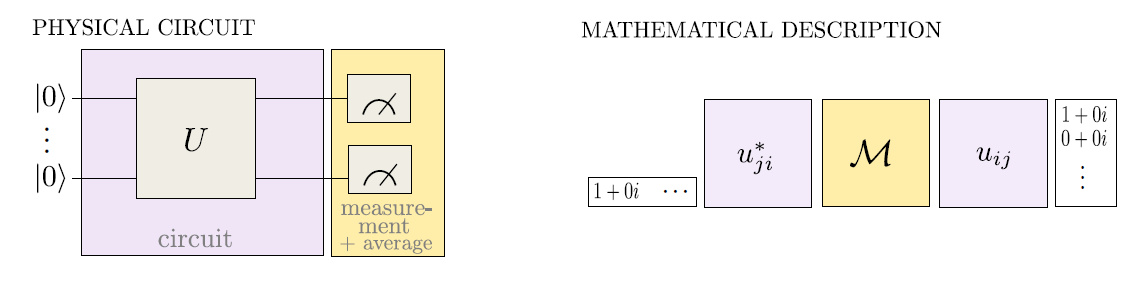


Quando queremos que os resultados dos cálculos sejam determinísticos, frequentemente interpretamos o resultado esperado da medição como o resultado. Este valor é estimado tomando muitas amostras e calculando a média delas.

In [ ]:
@qml.qnode(dev)
def circuit():
    qml.QubitUnitary(U, wires=[0, 1])
    return qml.expval(qml.PauliZ(wires=0)), qml.expval(qml.PauliZ(wires=1))

circuit()

tensor([0., 0.], requires_grad=True)

Novamente, o estado quântico deve ser o mesmo acima.

In [ ]:
dev.state

tensor([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j], requires_grad=True)

Os circuitos quânticos são decompostos em portas

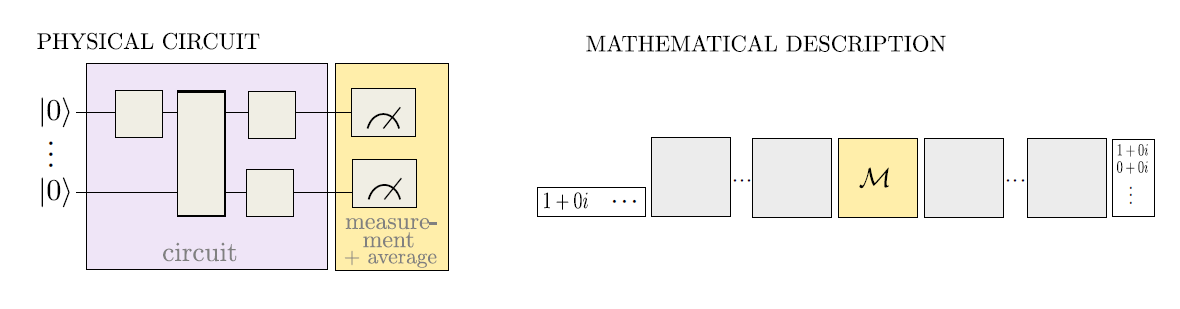
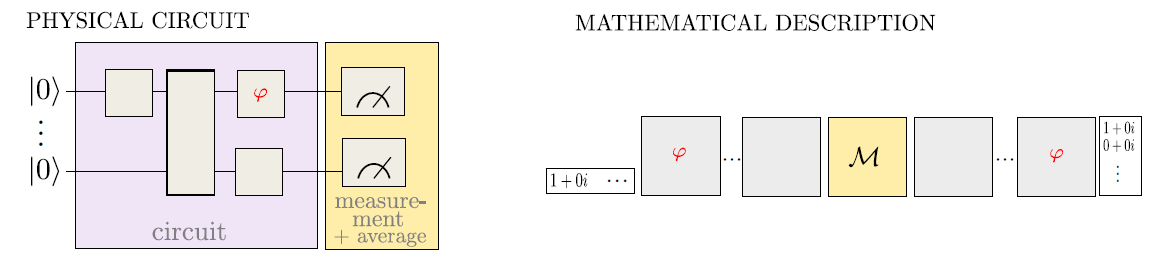

Para treinar circuitos, existe um subconjunto especial de portas que é de particular interesse: as portas de rotação Pauli. Eles "giram" uma representação especial do estado quântico em torno de um eixo específico. As portas dependem de um parâmetro escalar que é o ângulo de rotação.

In [ ]:
@qml.qnode(dev)
def circuit(w1, w2):
    qml.RX(w1, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(w2, wires=1)
    return qml.expval(qml.PauliZ(wires=0)), qml.expval(qml.PauliZ(wires=1))

circuit(1.2, 1.3)

tensor([0.36235775, 0.09693027], requires_grad=True)

Os nomes w1, w2 já sugerem que podem ser usados como os parâmetros treináveis de um modelo clássico de aprendizado de máquina. Mas também podemos chamar os parâmetros de controle x1, x2 e codificar recursos de dados em estados quânticos.

3. Um modelo de aprendizado de máquina quântico completo e seu gradiente

Finalmente, podemos usar rotinas ou modelos pré-codificados para construir convenientemente o modelo de aprendizado de máquina quântico completo que inclui uma parte de codificação de dados e uma parte treinável.

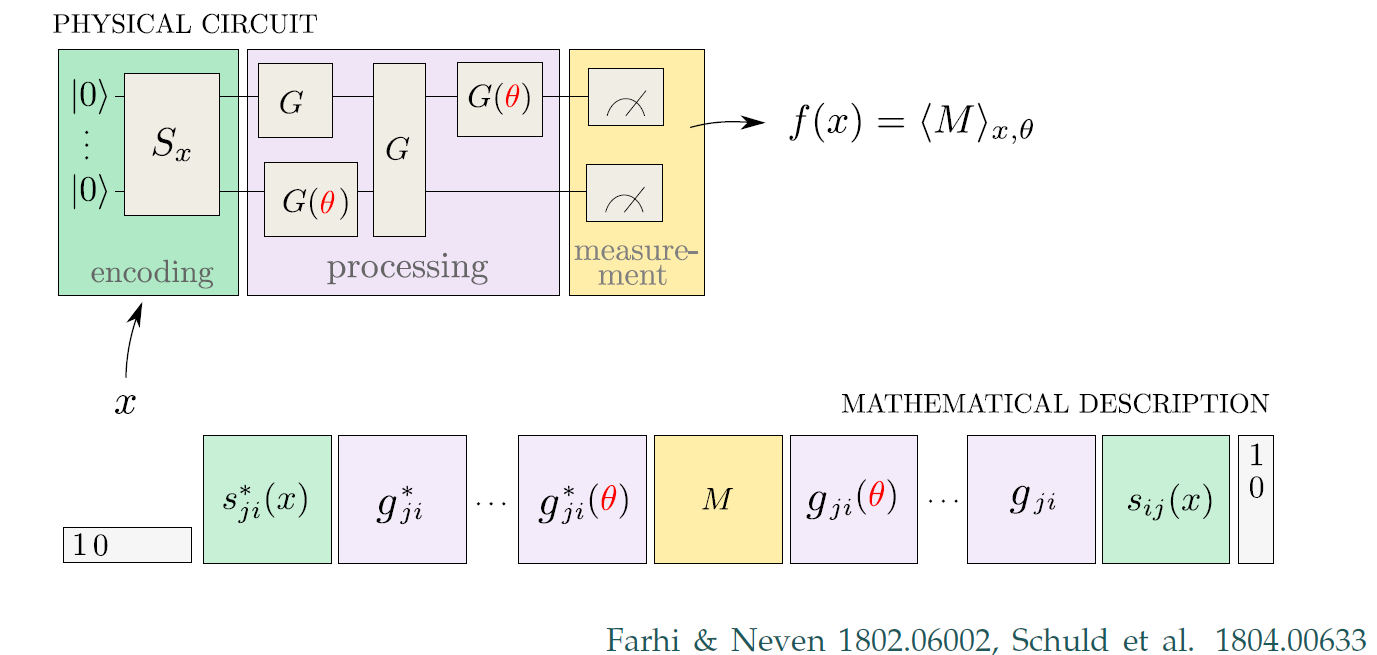

Aqui, usaremos o modelo AngleEmbedding para carregar os dados e BasicEntanglingLayers como a parte treinável do circuito.

In [ ]:
@qml.qnode(dev)
def quantum_model(x, w):
    qml.templates.AngleEmbedding(x, wires=[0, 1])
    qml.templates.BasicEntanglerLayers(w, wires=[0, 1])
    return qml.expval(qml.PauliZ(wires=0))


x = np.array([0.1, 0.2], requires_grad=False)
w = np.array([[-2.1, 1.2], [-1.4, -3.9], [0.5, 0.2]])

quantum_model(x, w)

tensor(0.012023, requires_grad=True)

In [ ]:
x = np.array([0.1, 0.2], requires_grad=False)
print(x)
w = np.array([[-2.1, 1.2], [-1.4, -3.9], [0.5, 0.2]])
print(w)
g1 = qml.templates.AngleEmbedding(x, wires=[0, 1])
g2 = qml.templates.BasicEntanglerLayers(w, wires=[0, 1])
g3 = qml.expval(qml.PauliZ(wires=0))
print(g1)
print(g2)
print(g3)

[0.1 0.2]
[[-2.1  1.2]
 [-1.4 -3.9]
 [ 0.5  0.2]]
[RX(tensor(0.1, requires_grad=False), wires=[0]), RX(tensor(0.2, requires_grad=False), wires=[1])]
[RX(tensor(-2.1, requires_grad=True), wires=[0]), RX(tensor(1.2, requires_grad=True), wires=[1]), CNOT(wires=[0, 1]), RX(tensor(-1.4, requires_grad=True), wires=[0]), RX(tensor(-3.9, requires_grad=True), wires=[1]), CNOT(wires=[0, 1]), RX(tensor(0.5, requires_grad=True), wires=[0]), RX(tensor(0.2, requires_grad=True), wires=[1]), CNOT(wires=[0, 1])]
expval(PauliZ(wires=[0]))
